# Анализ клиентов регионального банка. Выделение портретов клиентов, которые склонны уходить из банка.

1. [**Подготовка данных к анализу.**](#100101)
*******************************
2. [**Исследовательский анализ данных.**](#100102)
    * [2.1.Предварительные выводы.](#102100)
    * [2.2.Пол.](#102101)
    * [2.3.Возраст.](#102102)
    * [2.4.Город.](#102103)
    * [2.5.Наличие недвижимости.](#102104)
    * [2.6.Банковские продукты.](#102105)
    * [2.7.Средний возраст.](#102106)
    * [2.8.Средний скоринговый балл.](#102107)
    * [2.9.Матрица корреляции признаков.](#102108)
*******************************
3. [**Зависимости между признаками, существуют ли выбросы?**](#100103)
    * [3.1.Средняя зарплата по городам в зависимости от возраста.](#103100)
    * [3.2.Средние показатели количества объектов недвижимости у клиента в зависимости от возраста.](#103101)
    * [3.3.Средний баланс на счете в зависимости от возраста.](#103102)
    * [3.4.Средний баланс на счете в зависимости от города.](#103103)
    * [3.5.Зависимость среднего баланса на счете от количества использованных банковских продуктов.](#103104)
    * [3.6.Дополнительно исследуем нулевой баланс.](#103105)    
    * [3.7.Выбросы.](#103106)  
    * [3.8.Корреляционная матрица без выбросов и по городам.](#103107)  
*******************************
4. [**Разделение по оттоку.**](#100104)
    * [4.1.Матрица корреляции признаков среди лояльных клиентов.](#104100)
    * [4.2.Матрица корреляции признаков среди ушедших клиентов.](#104101)
    * [4.3.Средние значения признаков разделенные по оттоку.](#104102)
    * [4.4.Города разделенные по оттоку.](#104103)
    * [4.5.Половозрастной состав клиентов в разных городах разделенный по оттоку.](#104104)
    * [4.6.Средняя сумма на счетах в разных городах у клиентов разного возраста (разделение по оттоку).](#104105)
    * [4.7.Средняя зарплата клиентов разного возраста в городах (разделение по оттоку).](#104106)
    * [4.8.Банковские продукты разделение по оттоку и городам.](#104107)
    * [4.9.Средний баланс по банковским продуктам (разделение по оттоку и городам).](#104108)
    * [4.10.Активность клиентов в разных городах, разделение по оттоку.](#104109)
    * [4.11.Средний скоринговый балл в разных городах (разделение по оттоку).](#104110)
    
*************************************
5. [**Портрет клиента.**](#100105)
*************************
6. [**Проверка гипотез.**](#100106)
    * [6.1.Первая гипотеза. Отток в разных городах.](#106100)
    * [6.2.Вторая гипотеза. Средний баланс.](#106101)
    * [6.3.Третья гипотеза. Активность.](#106102)
    * [6.4.Четвертая гипотеза. Возраст.](#106103)
    * [6.5.Пятая гипотеза. Банковские продукты.](#106104)
    * [6.6.Шестая гипотеза. Доход.](#106105)
**************************************
7. [**t-SNE представление данных по оттоку.**](#100107)
******************************
8. [**Модель прогнозирования оттока пользователей.**](#100108)
    * [8.1.Модель случайного леса.](#108100)
    * [8.2.Модель логистической регрессии.](#108101)
    * [8.3.Модель градиентного бустинга.](#108102)
*************************************
9. [**Кластеризация клиентов.**](#100109)
    * [9.1.Дендрограмма кластеров и коэффициент силуэта.](#109100)
    * [9.2.K-means. Статистика значений кластера. ](#109101)
    * [9.3.График для пары признаков "банковский продукт" и "баланс".](#109102)
    * [9.4.График для пары признаков "банковский продукт " и "город". ](#109103)
    * [9.5.График для пары признаков "банковский продукт " и "возраст".](#109104)
    * [9.6.График для пары признаков "банковский продукт " и "кредитная карта".](#109105)
    * [9.7.График для пары признаков "кредитные карты " и "баланс".](#109106)
    * [9.8.График для пары признаков "скоринговый балл" и "баланс".](#109107)
    * [9.9.График для пары признаков "баланс" и "объекты недвижимости". ](#109108)
    * [9.10.График для пары признаков "баланс" и "город".](#109109)
    * [9.11.График для пары признаков "объекты недвижимости" и "город".](#109110)
******************************
10. [**Выводы.**](#100110)
*******************************
11. [**Базовые рекомендации по работе с клиентами.**](#100111)

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
import re
import math as mth
import numpy as np
import scipy.stats as stats
import sklearn
from sklearn.manifold import TSNE
from sklearn import preprocessing
import ml_metrics, string, re, pylab as pl
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from plotly import graph_objects as go
from pandas.plotting import register_matplotlib_converters
from pandas.plotting import scatter_matrix
from scipy import stats as st
from numpy import median


#from plotly.offline import iplot
#import plotly.figure_factory as ff

pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = 100
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)


from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from searchgrid import set_grid, make_grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import precision_recall_curve, classification_report

import sys; print(sys.version)
path = 'bank_dataset.csv'


3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


## 1. Подготовка данных к анализу <a id='100101'></a>

* *Прочитаем таблицу и посмотрим на параметры*

In [101]:
df=pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userid           10000 non-null  int64  
 1   score            10000 non-null  int64  
 2   City             10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Objects          10000 non-null  int64  
 6   Balance          6383 non-null   float64
 7   NumOfProducts    10000 non-null  int64  
 8   CreditCard       10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Churn            10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Всего в таблице 10000 объектов и 12 признаков для них.

In [102]:
df.isnull().sum()

userid                0
score                 0
City                  0
Gender                0
Age                   0
Objects               0
Balance            3617
NumOfProducts         0
CreditCard            0
IsActiveMember        0
EstimatedSalary       0
Churn                 0
dtype: int64

* много пропусков в колонке balance - 36%, очень много. Уточнить у коллег!

In [103]:
#Распечатаем первые и последние 10 строк:

#df.head(10)
#df.tail(20)

In [104]:
#назовем колонки немного по-другому и приведем к единообразию, колонку id приведем к типу object некоторые категориальные признаки:
df.columns = ['id', 'score', 'city', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'active', 'salary', 'churn']

df['id'] = df['id'].astype(str)
#df['products'] = df['products'].astype(str)
#df['credit_card'] = df['credit_card'].astype(str)
#df['active'] = df['active'].astype(str)
#df['churn'] = df['churn'].astype(str)
df.head(10)

,id,score,city,gender,age,objects,balance,products,credit_card,active,salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


Много пропусков в колонке баланс, причем с оттоком это не связано. Т.к. нулевой баланс нигде не указан, после запроса дополнительной информации, будем считать незаполненные колонки нулевым балансом.

In [105]:
id_ = df['id'].unique()
len(id_)

10000

Уникальные ID - все.

In [106]:
#заменим пропуски в балансе на 0:
df['balance'] = df['balance'].fillna(0)
#df.head()
#df.info()

## 2. Исследовательский анализ данных. <a id='100102'></a>

In [107]:
df.describe()

,score,age,objects,balance,products,credit_card,active,salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 2.1. Предварительные выводы. <a id='102100'></a>

* Скоринговый балл: max - 850, min - 350, средний 650, у большинства клиентов выше 700.
* Возраст клиентов от 18 до 92, средний 37-38 лет.
* Количество объектов в собственности от 0 до 10. В среднем 5 объектов в собственности.
* Баланс колеблется от 0 до 250898, mean - 76485, а median - 97198 довольно большой разброс, скорее всего на это влияет 36% клиентов с 0 балансом.
* Количество банковских продуктов - 4. Большинство пользуется 1-2-мя продуктами.
* Кредитные карты есть у 70,5% клиентов.
* 51,5% клиентов активны.
* Заработная плата колеблется от 11 до 199992. Средняя - 100000, без большого разброса. Можно сделать вывод, что большинство клиентов, держат на счете 1 среднюю зарплату.
* отток составляет 20,3% - большой %!

**Исследуем признаки далее:**

### 2.2. Пол. <a id='102101'></a>

In [108]:
gender = df['gender'].value_counts()
name_gender = ['Мужчин', 'Женщин']

fig1 = go.Figure(data=[go.Pie(labels=name_gender, values=gender)])
fig1.show()

Мужчины преобладают - 54,6%.

### 2.3. Возраст. <a id='102102'></a>

In [109]:
#разделим возраст на несколько групп:
def ages(age):
    if age <= 24:
        return 'до 25'
    elif age <= 34:
        return 'от 25 до 35'
    elif age <= 44:
        return 'от 35 до 45'
    elif age <= 54:
        return 'от 45 до 55'
    elif age <= 62:
        return 'от 55 до 63'
    return 'более 63'

df['t_age'] = df['age'].apply(ages)
age_s = df['t_age'].value_counts()
name_age = ['от 35 до 45', 'от 25 до 35', 'от 45 до 55', 'от 55 до 63', 'до 25', 'более 63']
fig66 = go.Figure(data=[go.Pie(labels=name_age, values=age_s)])
fig66.show()

* Более 72% клиентов люди в возрасте от 25 до 45 лет

### 2.4. Город. <a id='102103'></a>

In [110]:
city = df['city'].value_counts()
name_city = ['Ярославль', 'Ростов Великий', 'Рыбинск']
fig2 = go.Figure(data=[go.Pie(labels=name_city, values=city)])
fig2.show()

* Города соответствуют заявленным. Больше всего клиентов в основном городе - Ярославле(50.1%).

### 2.5. Наличие недвижимости. <a id='102104'></a>

In [111]:
#разделим клиентскую недвижимость на 4 группы:

def objects(object):
    if object == 0:
        return 'non'
    elif object <= 3:
        return 'few'
    elif object <= 6:
        return 'medium'
    return 'lot'

df['t_obj'] = df['objects'].apply(objects)
object_s = df['t_obj'].value_counts()
name_obj = ['Много недвижимости от 6 до 10 объектов', 'Мало недвижимости от 1-3 объектов', 
            'Среднее количество неджвижимости от 4 до 6', 'Нет недвижимости']
fig6 = go.Figure(data=[go.Pie(labels=name_obj, values=object_s)])
fig6.show()

* с объектами все в порядке. Большинство клиентов (35.3%) имеет в собственности от 6 до 10 объектов недвижимости.

### 2.6. Банковские продукты. <a id='102105'></a>

In [112]:
prod = df['products'].value_counts()
name_prod = ['1', '2', '3', '4']
fig3 = go.Figure(data=[go.Pie(labels=name_prod, values=prod)])
fig3.show()

* Большинство пользуются 1 продуктом (50.8%) и 2-мя продуктами (45.9%).

### 2.7. Средний возраст. <a id='102106'></a>

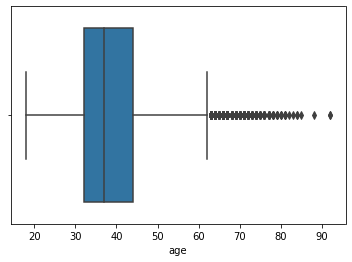

In [113]:
sns.boxplot(df['age'])

* Средний возраст 37-38 лет, после 62 начинаются выбросы. В дальнейшем, для исследования гипотез, сделаем срез по этому возрасту.

### 2.8. Средний скоринговый балл. <a id='102107'></a>

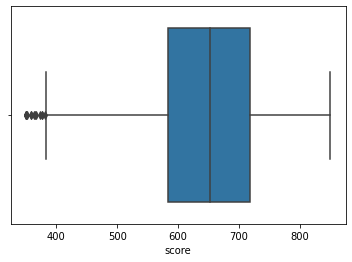

In [114]:
sns.boxplot(df['score'])

* Средний скоринговый балл 650, есть выбросы, в последующем сделаем срез от 380 баллов.

### 2.9. Матрица корреляции признаков. <a id='102108'></a>

(9.5, -0.5)

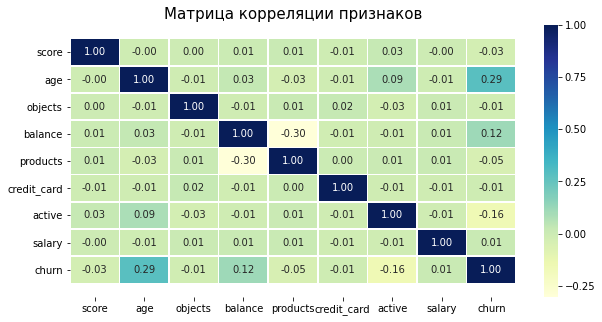

In [115]:
plt.figure(figsize=(10, 5))
plt.title('Матрица корреляции признаков', fontsize=15) 
heat = df.corr()
ax = sns.heatmap(heat, annot=True, fmt='.2f', linewidths=.5, linecolor='white', cmap='YlGnBu')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* сильной корреляции между признаками нет. Есть небольшая между возрастом и оттоком (0,29), между количеством используемых банковских продуктов и остатком на счете (0,3), еще меньшая связь между балансом и оттоком (0,12) и активностью и оттоком (0,16).

## 3. Зависимости между признаками, существуют ли выбросы? <a id='100103'></a>

* проведем более подробное исследование признаков:

### 3.1. Средняя зарплата по городам в зависимости от возраста. <a id='103100'></a>

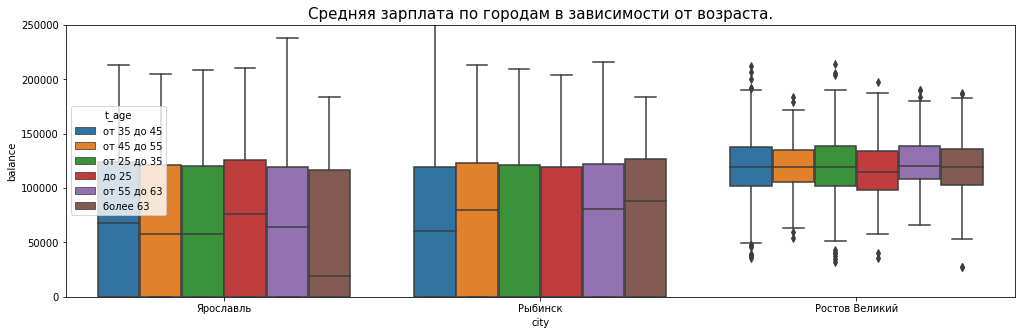

In [116]:
plt.figure(figsize=(17, 5))
sns.boxplot(x="city", y="balance", hue="t_age", data=df)
plt.ylim(0, 250000)
plt.title('Средняя зарплата по городам в зависимости от возраста.', fontsize=15) 
plt.show()

* Средняя зарплата колеблется около 100000 до 64 лет, потом начинаются очень сильные колебания, это объяснимо выходом на пенсию.
* В Ярославле ярко выражено падение з/п после 63 лет.
* В Рыбинске клиенты в возрасте от 18 до 35 имеют крайне низкую з/п. Уточнить!

### 3.2. Средние показатели количества объектов недвижимости у клиента в зависимости от возраста. <a id='103101'></a>

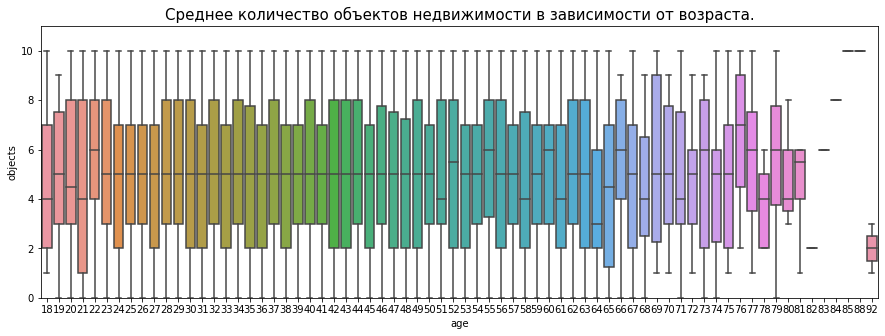

In [117]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='age', y='objects', data=df)
plt.ylim(0, 11)
plt.title('Среднее количество объектов недвижимости в зависимости от возраста.', fontsize=15) 
plt.show()

* У большинства в собственности 5 объектов недвижимости, снова видна граница колебаний после 62 лет.

### 3.3. Средний баланс на счете в зависимости от возраста. <a id='103102'></a>

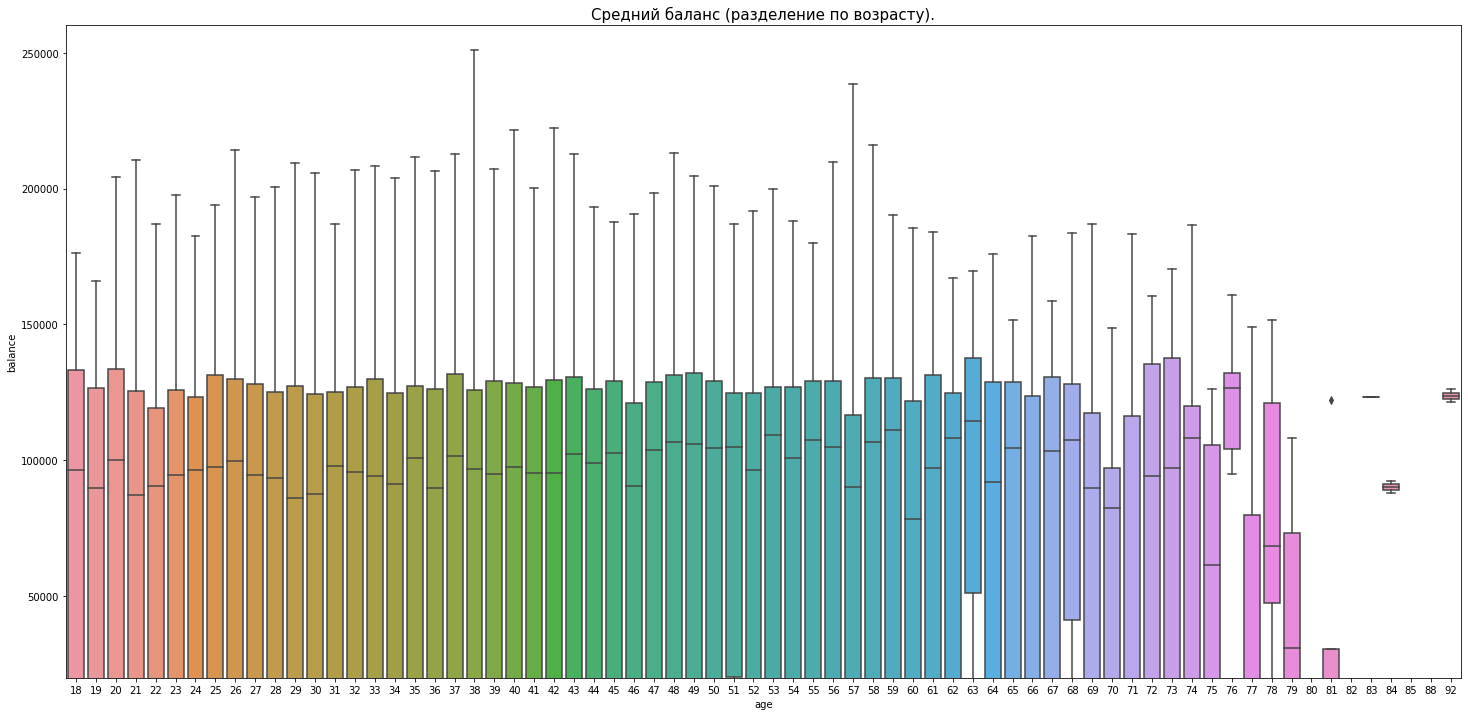

In [118]:
plt.figure(figsize=(25, 12))
sns.boxplot(x='age', y='balance', data=df)
plt.ylim(20000, 260000)
plt.title('Средний баланс (разделение по возрасту).', fontsize=15) 
plt.show()

* Средний баланс, так же как у заработной платы колеблется около 100000. После 59 начинаются колебания. Выбросов практически нет.

### 3.4. Средний баланс на счете в зависимости от города. <a id='103103'></a>

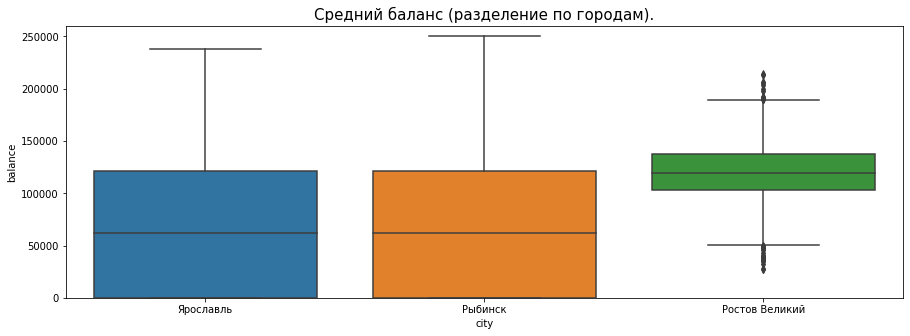

In [119]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='city', y='balance', data=df)
plt.ylim(0, 260000)
plt.title('Средний баланс (разделение по городам).', fontsize=15) 
plt.show()

* На средний баланс очень влияют клиенты из Ростова, т.к. их средний баланс практически в 2 раза выше, чем в Ярославле и Рыбинске, но нужно отметить, что так же много выбросов.

### 3.5. Зависимость среднего баланса на счете от количества использованных банковских продуктов. <a id='103104'></a>

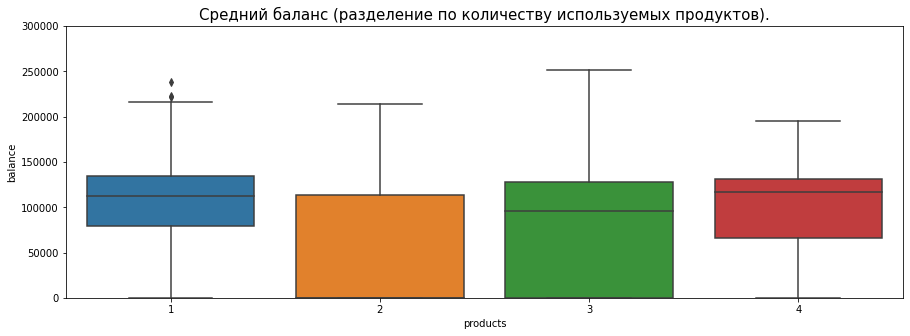

In [120]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='products', y='balance', data=df)
plt.ylim(0, 300000)
plt.title('Средний баланс (разделение по количеству используемых продуктов).', fontsize=15) 
plt.show()

* Средний баланс у пользующихся 1 и 4-мя продуктами на уровне 120000, у пользующихся 3-мя продуктами - 100000, у пользующихся 2-мя продуктами средний баланс на 0, возможно большинство клиентов с 0-м балансом пользуются 2-мя и 3-мя продуктами. Уточнить!

### 3.6. Дополнительно исследуем нулевой баланс. <a id='103105'></a>

In [121]:
null = df.query('balance == 0')
null.describe()

,score,age,objects,balance,products,credit_card,active,salary,churn
count,3617.000000,3617.000000,3617.000000,3617.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,649.452861,38.434891,5.071330,0.0,1.784628,0.716616,0.517832,98983.559549,0.138236
std,96.158798,10.492002,2.860781,0.0,0.496455,0.450704,0.499751,57730.828955,0.345195
min,350.000000,18.000000,0.000000,0.0,1.000000,0.000000,0.000000,90.070000,0.000000
25%,583.000000,31.000000,3.000000,0.0,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,651.000000,37.000000,5.000000,0.0,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,717.000000,43.000000,7.000000,0.0,2.000000,1.000000,1.000000,148330.970000,0.000000
max,850.000000,88.000000,10.000000,0.0,4.000000,1.000000,1.000000,199992.480000,1.000000


* все признаки похожи, как и в основной таблице. Посмотрим дополнительно:

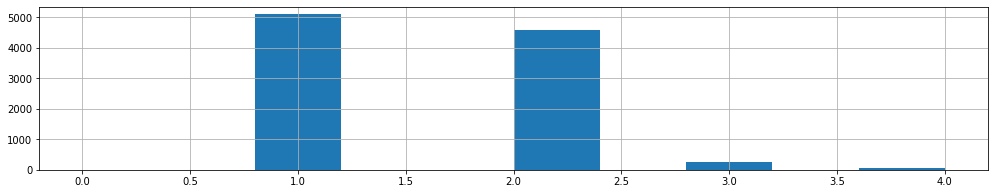

In [122]:
#используемые продукты в основных данных:
df['products'].hist(range=(0, 4), figsize=(17, 3))

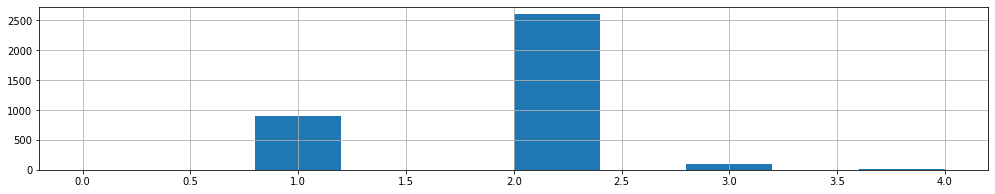

In [123]:
#используемые продукты среди клиентов с нулевым балансом:
null['products'].hist(range=(0, 4), figsize=(17, 3))

* заметно, что среди пользующихся 2-мя продуктами 0-й баланс преобладает (57%).

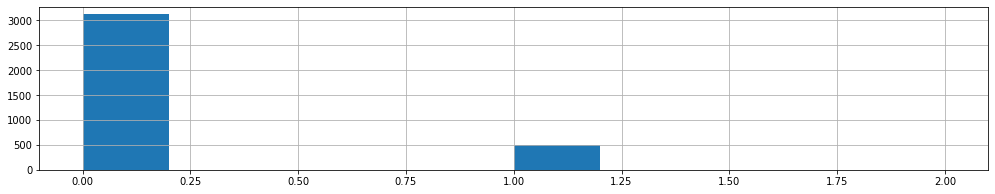

In [124]:
#отток среди клиентов с нулевым балансом:
null['churn'].hist(range=(0, 2), figsize=(17, 3))

* отток среди них 13,8% - видно, что нулевой баланс на отток не влияет.

### 3.7. Выбросы. <a id='103106'></a>
**Уберем выбросы из таблицы, и проведем дальнейшие исследования без них.**

In [125]:
df1 = df.query('age <= 62')
df1 = df1.query('score >= 380')
print('Ушло', (10000 - len(df1))/100, '% клиентов.')

Ушло 3.73 % клиентов.


### 3.8. Корреляционная матрица без выбросов и по городам. <a id='103107'></a>

(9.5, -0.5)

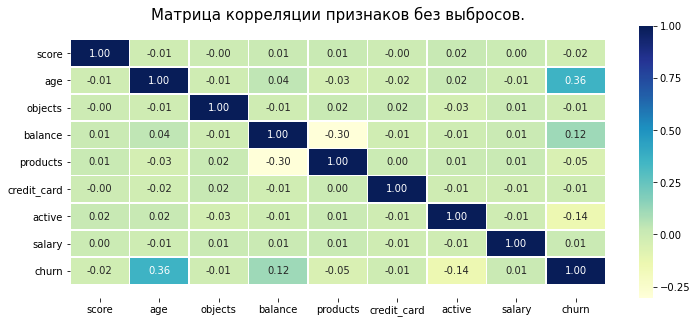

In [126]:
#Заменим буквенные значения пола на числовые, для последующих манипуляций:
df2 = df1
plt.figure(figsize=(12, 5))
plt.title('Матрица корреляции признаков без выбросов.', fontsize=15) 
df_2 = df2.corr()
ax = sns.heatmap(df_2, annot=True, fmt='.2f', linewidths=.5, linecolor='white', cmap='YlGnBu')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* сильной корреляции между признаками по-прежнему нет. Связь между возрастом и оттоком выросла от (0.29) до (0.36).

По городам

In [127]:
df_ya = df2.query('city == "Ярославль"')
df_ri = df2.query('city == "Рыбинск"')
df_ro = df2.query('city == "Ростов Великий"')

(9.5, -0.5)

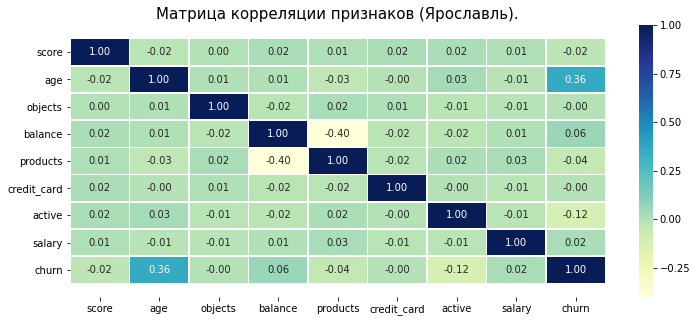

In [128]:
plt.figure(figsize=(12, 5))
plt.title('Матрица корреляции признаков (Ярославль).', fontsize=15) 
df_3 = df_ya.corr()
ax = sns.heatmap(df_3, annot=True, fmt='.2f', linewidths=.5, linecolor='white', cmap='YlGnBu')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

(9.5, -0.5)

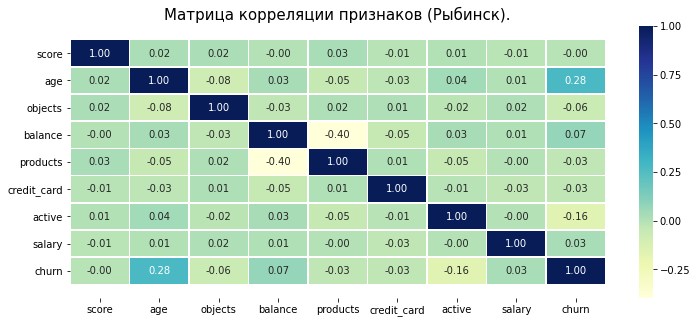

In [129]:
plt.figure(figsize=(12, 5))
plt.title('Матрица корреляции признаков (Рыбинск).', fontsize=15) 
df_4 = df_ri.corr()
ax = sns.heatmap(df_4, annot=True, fmt='.2f', linewidths=.5, linecolor='white', cmap='YlGnBu')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

(9.5, -0.5)

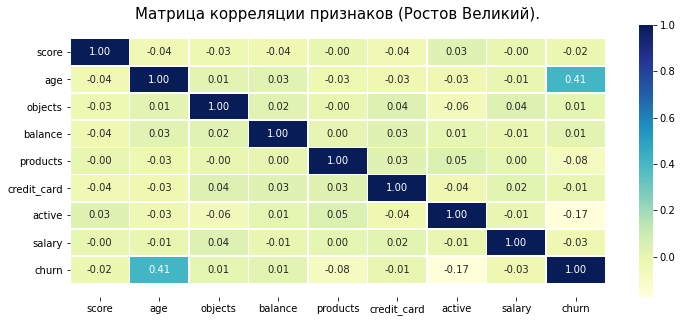

In [130]:
plt.figure(figsize=(12, 5))
plt.title('Матрица корреляции признаков (Ростов Великий).', fontsize=15) 
df_5 = df_ro.corr()
ax = sns.heatmap(df_5, annot=True, fmt='.2f', linewidths=.5, linecolor='white', cmap='YlGnBu')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* Сильнее всего связь между оттоком и возрастом в Ростове Великом.(0,41)
* Есть связь (0,4) между используемым продуктом и балансом только в Ярославле и Рыбинске.

## 4. Разделение по оттоку. <a id='100104'></a>

In [131]:
churn = df1.query('churn == 1')
remain = df1.query('churn == 0')

### 4.1. Матрица корреляции признаков среди лояльных клиентов. <a id='104100'></a>

(9.5, -0.5)

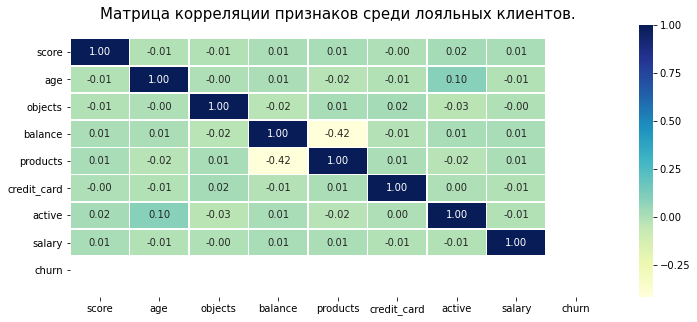

In [132]:
plt.figure(figsize=(12, 5))
plt.title('Матрица корреляции признаков среди лояльных клиентов.', fontsize=15) 
re = remain.corr()
ax = sns.heatmap(re, annot=True, fmt='.2f', linewidths=.5, linecolor='white', cmap='YlGnBu')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* немного усилилась (0,42) связь между балансом на счете и количеством используемых банковских продуктов и появилась небольшая(0,1) связь между активностью и возрастом.

### 4.2. Матрица корреляции признаков среди ушедших клиентов. <a id='104101'></a>

(9.5, -0.5)

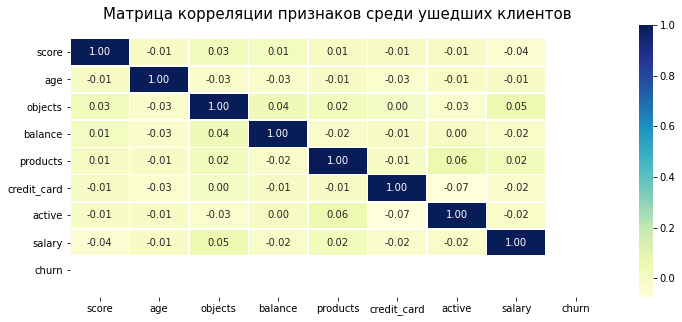

In [133]:
plt.figure(figsize=(12, 5))
plt.title('Матрица корреляции признаков среди ушедших клиентов', fontsize=15) 
ch = churn.corr()
ax = sns.heatmap(ch, annot=True, fmt='.2f', linewidths=.5, linecolor='white', cmap='YlGnBu')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* не видно зависимости между признаками среди ушедших клиентов.

### 4.3. Средние значения признаков разделенные по оттоку. <a id='104102'></a>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



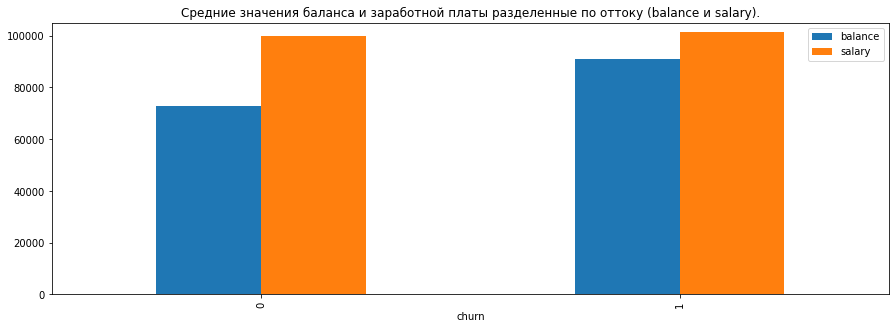

In [134]:
df1.groupby('churn')['balance', 'salary'].mean().plot(kind='bar', figsize = (15, 5), ylim=(0, 105000), title = ('Средние значения баланса и заработной платы разделенные по оттоку (balance и salary).'))

* средняя зарплата незначительно выше в группе оттока;
* в группе оттока средний баланс на счете выше.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



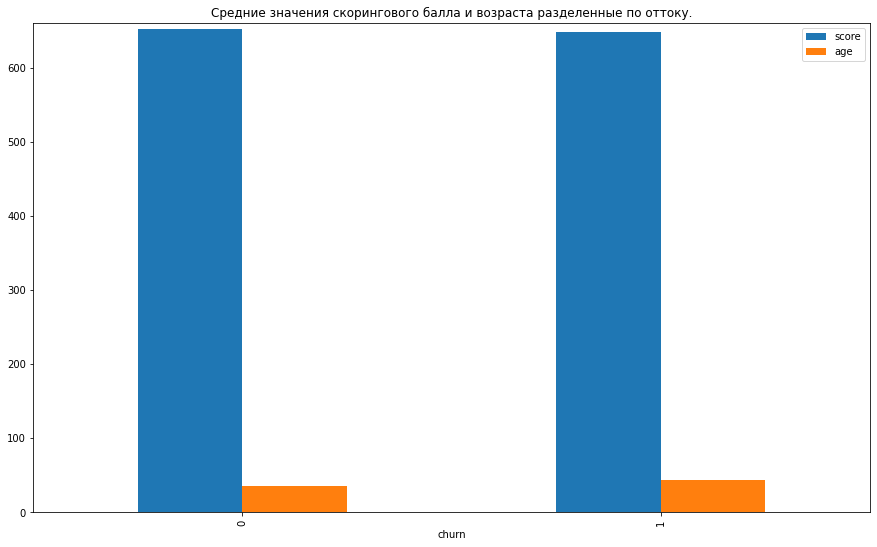

In [135]:
df1.groupby('churn')['score', 'age'].mean().plot(kind='bar', figsize = (15, 9), ylim=(0, 660), title = ('Средние значения скорингового балла и возраста разделенные по оттоку.'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



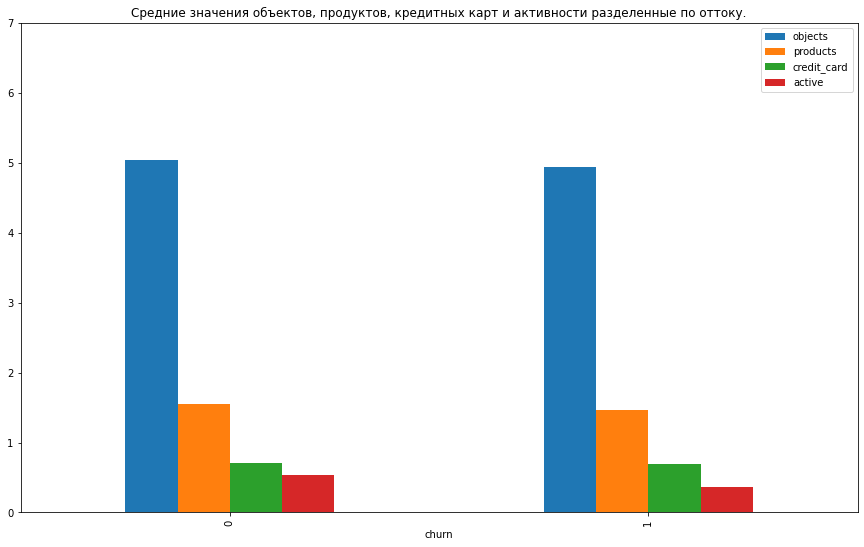

In [136]:
df1.groupby('churn')['objects', 'products', 'credit_card', 'active'].mean().plot(kind='bar', figsize = (15, 9), ylim=(0, 7), title = ('Средние значения объектов, продуктов, кредитных карт и активности разделенные по оттоку.'))

* средний скоринговый балл не отличается;
* средний возраст ушедших выше, чем у оставшихся;
* оставшиеся активнее;
* среднее количество продуктов незначительно ниже;
* в остальном различий нет.

**уточним:**

### 4.4. Города разделенные по оттоку. <a id='104103'></a>

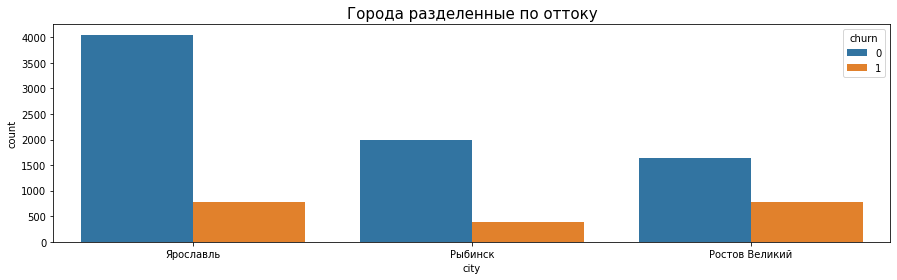

In [137]:
plt.figure(figsize=(15, 4))
sns.countplot(x='city', hue='churn', data=df1)
plt.title('Города разделенные по оттоку', fontsize=15)
plt.show()

In [138]:
df1.groupby(['city'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

city,Ростов Великий,Рыбинск,Ярославль
mean,0.322594,0.164706,0.161003


* отток явно выше в % соотношении в городе Ростов Великий - 32%. **ФАКТОР РИСКА** В Рыбинске - 16,5%. В Ярославле - 16,1%.

### 4.5. Половозрастной состав клиентов в разных городах разделенный по оттоку. <a id='104104'></a>

(45.5, -0.5)

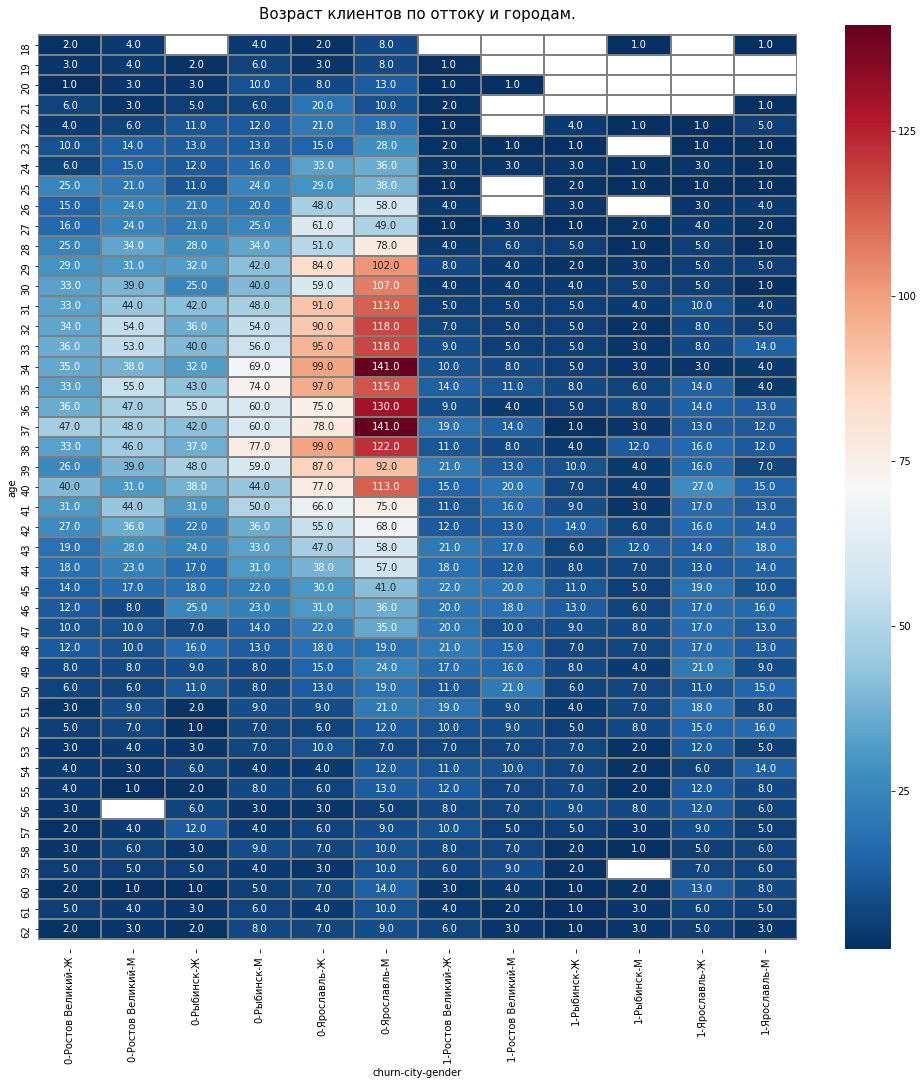

In [139]:
churn_pr = df1.pivot_table(index=['age'], columns=['churn', 'city', 'gender'], values='id', aggfunc='count')
plt.figure(figsize=(17, 17))
plt.title('Возраст клиентов по оттоку и городам.', fontsize=15) 
ax = sns.heatmap(churn_pr, annot=True, fmt='.1f', linewidths=1, linecolor='grey', cmap='RdBu_r')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* Отток выше среди клиентов в возрасте от 35 до 52 в Ростове Великом и Ярославле (оба пола).
* Среди оставшихся преобладают мужчины (больше) и женщины от 23 до 47 лет из Ярославля.

### 4.6. Средняя сумма на счетах в разных городах у клиентов разного возраста (разделение по оттоку). <a id='104105'></a>

(5.5, -0.5)

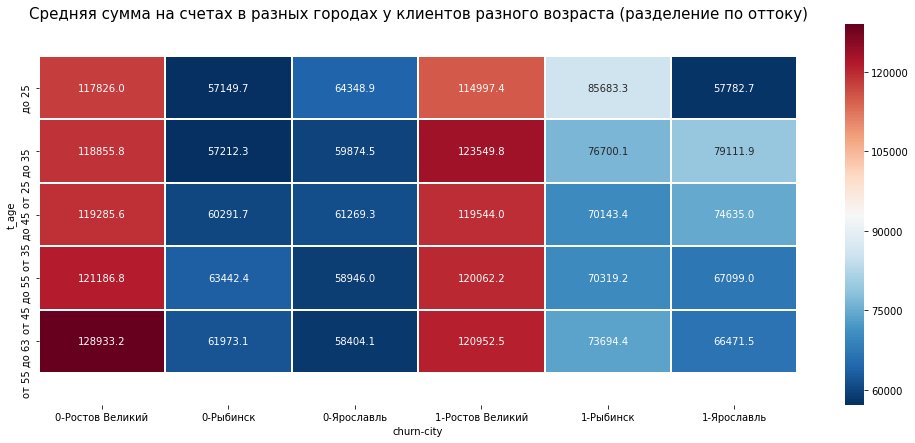

In [140]:
churn_age_balmean11 = df1.pivot_table(index=['t_age'], columns=['churn', 'city'], values='balance', aggfunc='mean')
plt.figure(figsize=(17, 7))
plt.title('Средняя сумма на счетах в разных городах у клиентов разного возраста (разделение по оттоку)', fontsize=15) 
ax = sns.heatmap(churn_age_balmean11, annot=True, fmt='.1f', linewidths=1, linecolor='white', cmap='RdBu_r')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* Средние суммы на счетах выше в городе Ростове Великом во обеих группах.
* Есть группа молодых клиентов в Рыбинске, с большими остатками на счете, которые ушли.
* Ушедшие клиенты в Ярославле имели, в среднем, бОльшие остатки на счете, кроме тех, кто в возрасте до 25 лет.

### 4.7. Средняя зарплата клиентов разного возраста в городах (разделение по оттоку). <a id='104106'></a>

(5.5, -0.5)

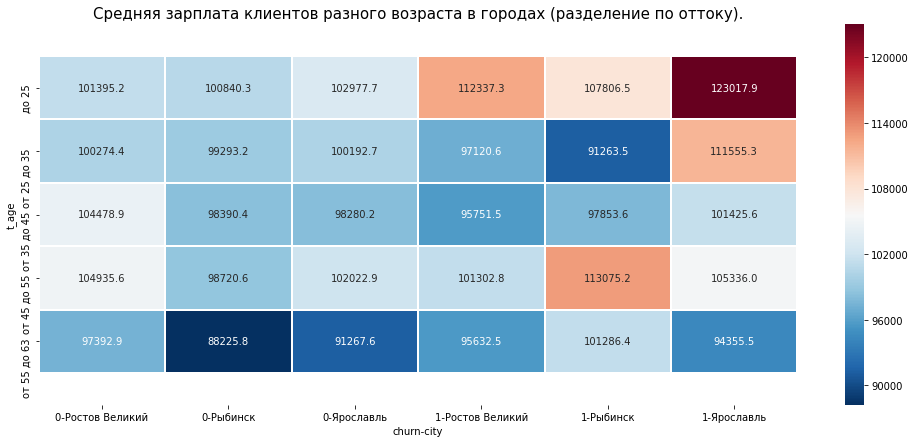

In [141]:
churn_age_salmean = df1.pivot_table(index=['t_age'], columns=['churn', 'city'], values='salary', aggfunc='mean')
plt.figure(figsize=(17, 7))
plt.title('Средняя зарплата клиентов разного возраста в городах (разделение по оттоку).', fontsize=15) 
ax = sns.heatmap(churn_age_salmean, annot=True, fmt='.1f', linewidths=1, linecolor='white', cmap='RdBu_r')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* Много среди ушедших во всех городах, молодых (до 25) клиентов с высокой зарплатой. Выяснить причину оттока среди них!
* В Ярославле и Рыбинске так же отток и среди других возрастов с более высокой з/п.
* В Ростове же наоборот, отток больше среди клиентов со средней з/п  95000-97000 в возрасте от 25 до 63.
* В целом видна равномерность зарплаты у осташихся и разнородность среди ушедших, возможно есть связь с источником заработка, допустим равномерная заработная плата в государственной, бюджетной сфере, а неравномерная в сфере предпринимательства.

### 4.8. Банковские продукты разделение по оттоку и городам. <a id='104107'></a>

(4.5, -0.5)

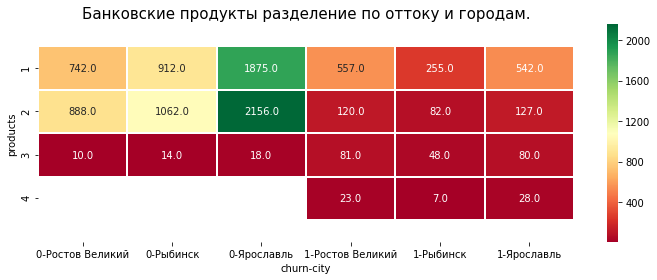

In [142]:
churn_prod_city = df1.pivot_table(index=['products'], columns=['churn', 'city'], values='id', aggfunc='count')
plt.figure(figsize=(12, 4))
plt.title('Банковские продукты разделение по оттоку и городам.', fontsize=15) 
ax = sns.heatmap(churn_prod_city, annot=True, fmt='.1f', linewidths=1, linecolor='white', cmap='RdYlGn')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* Присутствует явное разделение ушедших и оставшихся клиентов по количеству используемых продуктов. У оставшихся клиентов преобладает использование двух продуктов, затем одного продукта, трёх в незначительном количестве.
* Ушедшие клиенты больше пользовались одним продуктом, двумя в 3 раза меньше, тремя еще меньше, но нужно обратить внимание, что пользование 4-мя продуктами было только среди ушедших.

### 4.9. Средний баланс по банковским продуктам (разделение по оттоку и городам). <a id='104108'></a>

(4.5, -0.5)

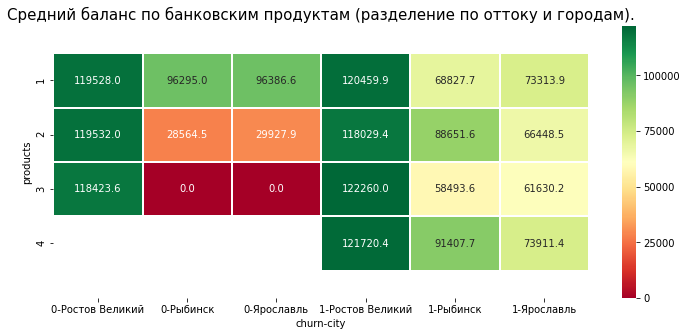

In [143]:
churn_prod_city_bal = df1.pivot_table(index=['products'], columns=['churn', 'city'], values='balance', aggfunc='mean')
plt.figure(figsize=(12, 5))
plt.title('Средний баланс по банковским продуктам (разделение по оттоку и городам).', fontsize=15) 
ax = sns.heatmap(churn_prod_city_bal, annot=True, fmt='.1f', linewidths=1, linecolor='white', cmap='RdYlGn')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* по какой-то причине, все пользующиеся 4-мя продуктами ушли,
* у пользующихся (ушедших) 2-мя продуктами средний баланс в Рыбинске выше, почти в 3 раза, в Ярославле в 2 раза, а в Ростове не отличается,
* у пользующихся (оставшихся) 3-мя продуктами средний баланс в Рыбинске и Ярославле на нуле.

* **уточнить у коллег, по какой причине были не заполнены колонки с балансом среди пользующихся тремя продуктами и частично двумя, в городах Ярославль и Рыбинск!**

### 4.10. Активность клиентов в разных городах, разделение по оттоку. <a id='104109'></a>

(2.5, -0.5)

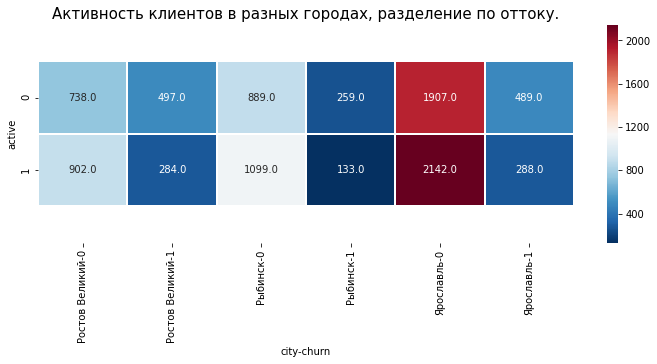

In [144]:
churn_active_city = df1.pivot_table(index=['active'], columns=['city', 'churn'], values='id', aggfunc='count')
plt.figure(figsize=(12, 4))
plt.title('Активность клиентов в разных городах, разделение по оттоку.', fontsize=15) 
ax = sns.heatmap(churn_active_city, annot=True, fmt='.1f', linewidths=1, linecolor='white', cmap='RdBu_r')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* В каждом городе среди ушедших примерно в 2 раза больше неактивных клиентов. **ФАКТОР РИСКА**

### 4.11. Средний скоринговый балл в разных городах (разделение по оттоку). <a id='104110'></a>

(3.5, -0.5)

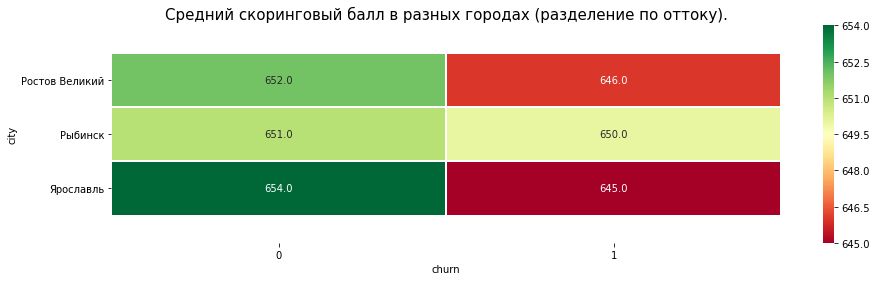

In [145]:
churn_city_score = df1.pivot_table(index=['city'], columns=['churn'], values='score', aggfunc='median')
plt.figure(figsize=(15, 4))
plt.title('Средний скоринговый балл в разных городах (разделение по оттоку).', fontsize=15) 
ax = sns.heatmap(churn_city_score, annot=True, fmt='.1f', linewidths=1, linecolor='white', cmap='RdYlGn')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* В целом в группе оттока средний скоринговый балл немного ниже, самая большая разница в Ярославле.

In [146]:
remain['score'].value_counts()
#дополнительное исследование группы: (на всякий случай)
#scor_850 = remain.query('score == 850')
#scor_850.describe()

#ничего необычного

850    184
678     48
684     43
633     41
679     41
670     40
655     40
667     40
660     40
701     39
686     38
683     38
663     37
714     37
705     36
652     36
648     36
640     35
613     35
682     35
584     35
712     35
699     34
710     34
639     34
645     34
696     34
687     34
627     34
680     33
718     33
709     33
619     32
695     32
646     32
637     32
711     32
554     32
706     32
607     31
593     31
656     31
681     31
601     31
724     31
632     31
605     31
635     31
628     31
651     31
608     31
730     30
592     30
606     30
642     30
577     30
685     30
634     30
641     30
671     30
694     29
631     29
677     29
669     29
625     29
597     29
676     29
579     29
583     29
594     29
653     29
630     29
658     29
590     29
620     28
624     28
666     28
644     28
629     28
698     28
650     28
662     28
622     28
649     28
643     28
611     28
623     28
733     27
659     27
707     27
636     27

* Выделяется группа (184 человекa) клиентов с максимальным (850) скоринговым баллом в группе оставшихся. **Выяснить у коллег не ошибка ли?**

## 5. Портрет клиента. <a id='100105'></a>

Средний возраст клиента 37-38 лет, у него 5 объектов недвижимости в собственности, средняя заработная плата 100000, ее же (100000) он держит на счете. Клиент активен и имеет кредитную карту. Он использует 1-2 банковских продукта. Средний скоринговый балл - 650.

У клиентов склонных к оттоку, есть признаки:
* пропадает активность,
* клиенты склонны к большему накоплению (возможно отток связан с невыгодными условиями вклада?),
* отток выше в Ростове Великом,
* к оттоку склонны клиенты более старшего возраста (35-52);
* но так же склонны к оттоку клиенты до 25 лет с большой заработной платой;
* склонные к оттоку начинают пользоваться уже 4-мя банковкими продуктами (возможно, количество провоцирует отток).

## 6. Проверка гипотез. <a id='100106'></a>

### 6.1. Первая гипотеза. Отток в разных городах. <a id='106100'></a>
******************
Из данных можно сделать вывод, что отток в Ростове Великом выше, проверим.
* **Выдвинем нулевую гипотезу, что отток в разных городах не отличается.**

In [147]:
g_ya = df_ya['churn']
g_ri = df_ri['churn']
g_ro = df_ro['churn']
alpha = .05 # критический уровень статистической значимости

results_ya_ri_1 = st.ttest_ind(
    g_ya, 
    g_ri)

results_ya_ro_1 = st.ttest_ind(
    g_ya, 
    g_ro)

results_ro_ri_1 = st.ttest_ind(
    g_ro, 
    g_ri)

bonferroni_alpha = alpha / 3

print('p-значение для сравнения групп оттока в Ярославле и Рыбинске: ', results_ya_ri_1.pvalue)
if (results_ya_ri_1.pvalue < bonferroni_alpha):
    print("Отвергаем нулевую гипотезу для сравнения групп по оттоку - Ярославль и Рыбинск")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения групп по оттоку - Ярославль и Рыбинск")
    
print('p-значение для сравнения групп оттока в Ярославле и Ростове Великом: ', results_ya_ro_1.pvalue)    
if (results_ya_ro_1.pvalue < bonferroni_alpha):
    print("Отвергаем нулевую гипотезу для сравнения групп по оттоку - Ярославль и Ростов Великий")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения групп по оттоку - Ярославль и Ростов Великий")
    
print('p-значение для сравнения групп оттока в Рыбинске и Ростове Великом: ', results_ro_ri_1.pvalue)    
if (results_ro_ri_1.pvalue < bonferroni_alpha):
    print("Отвергаем нулевую гипотезу для сравнения групп по оттоку - Рыбинск и Ростов Великий")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения групп по оттоку - Рыбинск и Ростов Великий")

p-значение для сравнения групп оттока в Ярославле и Рыбинске:  0.6884570654151617
Не получилось отвергнуть нулевую гипотезу для сравнения групп по оттоку - Ярославль и Рыбинск
p-значение для сравнения групп оттока в Ярославле и Ростове Великом:  3.9534970755932625e-57
Отвергаем нулевую гипотезу для сравнения групп по оттоку - Ярославль и Ростов Великий
p-значение для сравнения групп оттока в Рыбинске и Ростове Великом:  1.033420387656615e-37
Отвергаем нулевую гипотезу для сравнения групп по оттоку - Рыбинск и Ростов Великий


Можно с уверенностью говорить, что Ростов Великий отличается по оттоку.

### 6.2. Вторая гипотеза. Средний баланс. <a id='106101'></a>
*********************
Средний баланс среди ушедших клиентов выше, проверим.
* **Выдвинем нулевую гипотезу, что баланс не отличается.**

In [148]:
a_001 = churn['balance']
a_011 = remain['balance']

alpha = .05 # критический уровень статистической значимости

results_8 = st.ttest_ind(
    a_001, 
    a_011)

print('p-значение для сравнения оставшихся и ушедших клиентов по балансу: ', results_8.pvalue)
if (results_8.pvalue < alpha):
    print("Отвергаем нулевую гипотезу для сравнения баланса групп клиентов")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения баланса групп клиентов")

p-значение для сравнения оставшихся и ушедших клиентов по балансу:  1.6472410354833798e-30
Отвергаем нулевую гипотезу для сравнения баланса групп клиентов


Можно с уверенностью говорить, что баланс отличается среди ушедших и оставшихся клиентов.

### 6.3. Третья гипотеза. Активность. <a id='106102'></a>
****************************
Из данных выявили, что активность ниже среди ушедших клиентов, проверим.
* **Выдвинем нулевую гипотезу, что активность в среди ушедших и оставшихся клиентов не отличается.**

In [149]:
a_0 = churn['active']
a_1 = remain['active']

alpha = .05 # критический уровень статистической значимости

results_3 = st.ttest_ind(
    a_0, 
    a_1)

print('p-значение для сравнения оставшихся и ушедших клиентов по активности: ', results_3.pvalue)
if (results_3.pvalue < alpha):
    print("Отвергаем нулевую гипотезу для сравнения активности групп клиентов")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения активности групп клиентов")

p-значение для сравнения оставшихся и ушедших клиентов по активности:  2.874694326462901e-45
Отвергаем нулевую гипотезу для сравнения активности групп клиентов


Можно с уверенностью говорить, что активность среди ушедших и оставшихся клиентов отличается.

### 6.4. Четвертая гипотеза. Возраст. <a id='106103'></a>
*******************************
Из данных выявили, что возраст больше среди ушедших клиентов, проверим.
* **Выдвинем нулевую гипотезу, что возраст среди ушедших и оставшихся клиентов не отличается.**

In [150]:
age_0 = churn['age']
age_1 = remain['age']

alpha = .05 # критический уровень статистической значимости

results_4 = st.ttest_ind(
    age_0, 
    age_1)

print('p-значение для сравнения оставшихся и ушедших клиентов по возрасту: ', results_4.pvalue)
if (results_4.pvalue < alpha):
    print("Отвергаем нулевую гипотезу для сравнения возраста групп клиентов")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения возраста групп клиентов")

p-значение для сравнения оставшихся и ушедших клиентов по возрасту:  1.1179641934852285e-289
Отвергаем нулевую гипотезу для сравнения возраста групп клиентов


Можно с уверенностью говорить, что возраст среди ушедших и оставшихся клиентов отличается.

### 6.5. Пятая гипотеза. Банковские продукты. <a id='106104'></a>
*****************************
Из данных выявили, что количество используемых банковских продуктов влияет на отток, проверим.
* **Выдвинем нулевую гипотезу, что количество продуктов ушедших и оставшихся клиентов не отличается.**

In [151]:
prod_0 = churn['products']
prod_1 = remain['products']

alpha = .05 # критический уровень статистической значимости

results_5 = st.ttest_ind(
    prod_0, 
    prod_1)

print('p-значение для сравнения оставшихся и ушедших клиентов по возрасту: ', results_5.pvalue)
if (results_5.pvalue < alpha):
    print("Отвергаем нулевую гипотезу для сравнения возраста групп клиентов")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения возраста групп клиентов")

p-значение для сравнения оставшихся и ушедших клиентов по возрасту:  5.995476382981937e-07
Отвергаем нулевую гипотезу для сравнения возраста групп клиентов


Можно с уверенностью говорить, что количество используемых банковских продуктов у ушедших и оставшихся клиентов отличается.

### 6.6. Шестая гипотеза. Доход. <a id='106105'></a>
*****************************
Из данных выявили, что заработная плата немного влияет на отток, проверим.
* **Выдвинем нулевую гипотезу, что зарплата ушедших и оставшихся клиентов не отличается.**

In [152]:
prod_zp_c = churn['salary']
prod_zp_r = remain['salary']

alpha = .05 # критический уровень статистической значимости

results_6 = st.ttest_ind(
    prod_zp_c, 
    prod_zp_r)

print('p-значение для сравнения оставшихся и ушедших клиентов по возрасту: ', results_6.pvalue)
if (results_6.pvalue < alpha):
    print("Отвергаем нулевую гипотезу для сравнения возраста групп клиентов")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения возраста групп клиентов")

p-значение для сравнения оставшихся и ушедших клиентов по возрасту:  0.3561780225740535
Не получилось отвергнуть нулевую гипотезу для сравнения возраста групп клиентов


Можно с уверенностью говорить, что заработная плата у ушедших и оставшихся клиентов не отличается.

## 7. t-SNE представление данных по оттоку. <a id='100107'></a>

_Диаграммы сделала больше для примера представления данных. В нашем случае они не позволяют увидеть явных взаимосвязей, т.к. отток не сосредоточен в одном-двух местах, а если бы был, смогли бы наглядно увидеть взимосвязи._

In [153]:
#Заменим буквенные значения пола на числовые, для последующих манипуляций:
df1['gender'] = df1['gender'].replace('Ж', 0, regex=True)
df1['gender'] = df1['gender'].replace('М', 1, regex=True)
df1['gender'] = df1['gender'].astype(int)
df1['city'] = df1['city'].replace('Ярославль', 1, regex=True)
df1['city'] = df1['city'].replace('Рыбинск', 2, regex=True)
df1['city'] = df1['city'].replace('Ростов Великий', 3, regex=True)
df1['city'] = df1['city'].astype(int)
#для ML:
df2 = df1[['id', 'score', 'city', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'active', 'salary', 'churn']]
#для t-SNE представления:
df3 = df1[['id', 'score', 'city', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'active', 'salary']]

* Раскрасим полученное t-SNE представление данных по оттоку (синие – лояльные, оранжевые – ушедшие клиенты).

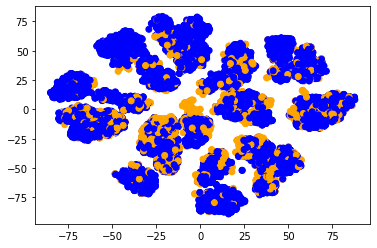

In [154]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df3)

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df1['churn'].map({0: 'blue', 1: 'orange'}));


Видим, что ушедшие клиенты преимущественно "кучкуются" в некоторых областях признакового пространства, жаль, что не в определенной области.

Чтоб лучше понять картинку, можно также раскрасить ее по остальным признакам – по городу, кредитным картам, полу, активности, банковским продуктам. Синие участки соответствуют объектам, обладающим этим бинарным признаком.

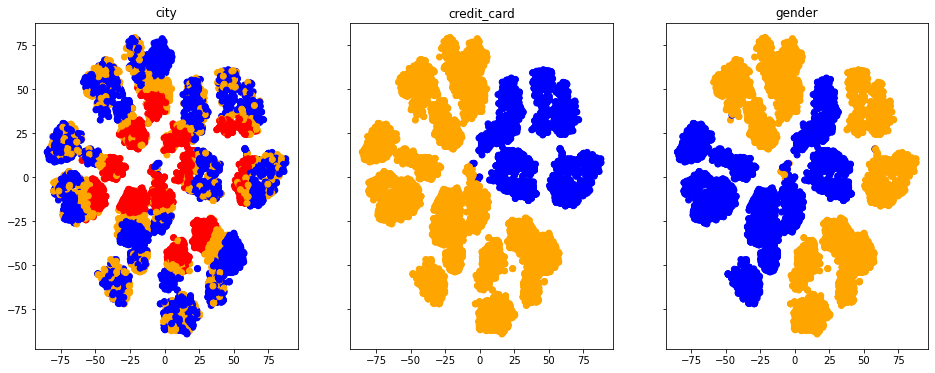

In [155]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(16,6))
axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df3['city'].map({1: 'blue', 2: 'orange', 3: 'red'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df3['credit_card'].map({0: 'blue', 1: 'orange'}));
axes[2].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df3['gender'].map({0: 'blue', 1: 'orange'}));
axes[0].set_title('city');
axes[1].set_title('credit_card');
axes[2].set_title('gender');

*_Используемые продукты "раскрасим" 4-мя цветами_*

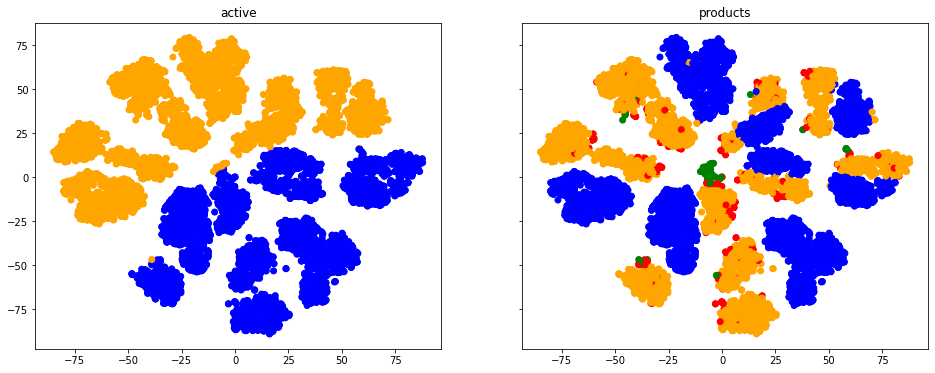

In [156]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df3['active'].map({0: 'blue', 1: 'orange'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df3['products'].map({1: 'blue', 2: 'orange', 3: 'red', 4: 'green'}));
axes[0].set_title('active');
axes[1].set_title('products');

По диаграмме очень заметно, что ушедшие в отток пользовались 4-м(мя) продуктами - зеленая небольшая зона посередине.

## 8. Модель прогнозирования оттока пользователей. <a id='100108'></a>

In [157]:
#Pазобьем данные на обучающую и валидационную выборку функцией train_test_split():

X_train, X_valid, y_train, y_valid = train_test_split(df2.drop(columns = ['churn']), df1['churn'], 
                                                    test_size = 0.25, random_state = 1345)

In [158]:
# определим функцию, которая будет выводить метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [159]:
# обучите StandartScaler на обучающей выборке:
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных:
X_train_st = scaler.transform(X_train)
X_valid_st = scaler.transform(X_valid)

### 8.1. Модель случайного леса. <a id='108100'></a>

In [160]:
#подберем в цикле лучшие параметры:
for depth in range(8, 17, 1):
    model = RandomForestClassifier(random_state=1345, n_estimators=depth)
    model.fit(X_train, y_train)
    report_RFC = classification_report(y_valid, model.predict(X_valid), target_names=['Non-churned', 'Churned'])
    print(depth, report_RFC)

8               precision    recall  f1-score   support

 Non-churned       0.87      0.95      0.91      1921
     Churned       0.69      0.42      0.52       486

    accuracy                           0.84      2407
   macro avg       0.78      0.68      0.71      2407
weighted avg       0.83      0.84      0.83      2407

9               precision    recall  f1-score   support

 Non-churned       0.88      0.94      0.91      1921
     Churned       0.66      0.49      0.56       486

    accuracy                           0.85      2407
   macro avg       0.77      0.71      0.73      2407
weighted avg       0.83      0.85      0.84      2407

10               precision    recall  f1-score   support

 Non-churned       0.87      0.95      0.91      1921
     Churned       0.70      0.43      0.53       486

    accuracy                           0.85      2407
   macro avg       0.79      0.69      0.72      2407
weighted avg       0.84      0.85      0.83      2407

11          

Наиболее сбалансированный результат c 9 деревьями.

In [161]:
model1 = RandomForestClassifier(random_state=1345, n_estimators=9)

model1.fit(X_train_st, y_train)

#предскажем на валидационном датасете:
rfc_predictions = model1.predict(X_valid_st)
rfc_probabilities = model1.predict_proba(X_valid_st)[:,1]

# выведем все метрики
print_all_metrics(y_valid, rfc_predictions, rfc_probabilities, title='Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.85
	Precision: 0.66
	Recall: 0.49
	F1: 0.56
	ROC_AUC: 0.82


### 8.2. Модель логистической регрессии. <a id='108101'></a>

In [162]:
# зададим алгоритм для модели логистической регрессии:
lr_model = LogisticRegression(random_state=1345)

# обучим модель на тренировочной выборке:
lr_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы:
lr_predictions = lr_model.predict(X_valid_st)
lr_probabilities = lr_model.predict_proba(X_valid_st)[:,1]

# выведем все метрики
print_all_metrics(y_valid, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.82
	Precision: 0.62
	Recall: 0.28
	F1: 0.38
	ROC_AUC: 0.79


У логистической регрессии результат хуже, чем у случайного леса - 0.82.

### 8.3. Модель градиентного бустинга. <a id='108102'></a>

In [163]:
#подберем в цикле лучшие параметры:
for depth in range(2, 10, 1):
    model = GradientBoostingClassifier(random_state=1345, max_depth=depth)
    model.fit(X_train, y_train)
    report_GBC = classification_report(y_valid, model.predict(X_valid), target_names=['Non-churned', 'Churned'])
    print(depth, report_GBC)

2               precision    recall  f1-score   support

 Non-churned       0.87      0.96      0.91      1921
     Churned       0.74      0.44      0.56       486

    accuracy                           0.86      2407
   macro avg       0.81      0.70      0.74      2407
weighted avg       0.85      0.86      0.84      2407

3               precision    recall  f1-score   support

 Non-churned       0.88      0.96      0.91      1921
     Churned       0.73      0.47      0.57       486

    accuracy                           0.86      2407
   macro avg       0.80      0.71      0.74      2407
weighted avg       0.85      0.86      0.85      2407

4               precision    recall  f1-score   support

 Non-churned       0.88      0.95      0.91      1921
     Churned       0.72      0.48      0.58       486

    accuracy                           0.86      2407
   macro avg       0.80      0.72      0.75      2407
weighted avg       0.85      0.86      0.85      2407

5            

Возьмем глубину дерева - 5.

In [164]:
#создадим модель логистической регрессии:
model_gb = GradientBoostingClassifier(max_depth = 5, random_state=1345)

# обучим модель на тренировочной выборке:
model_gb.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы:
gb_predictions = model_gb.predict(X_valid)
gb_probabilities = model_gb.predict_proba(X_valid)[:,1]

# выведем все метрики
print_all_metrics(y_valid, gb_predictions, gb_probabilities , title='Метрики для модели градиентного бустинга:')

Метрики для модели градиентного бустинга:
	Accuracy: 0.86
	Precision: 0.72
	Recall: 0.51
	F1: 0.59
	ROC_AUC: 0.86


**Итак, по результатам анализа наших моделей можно сказать, что лучше всего себя показал градиентный бустинг (точность 86%) и случайный лес (точность 84%), логистическая регрессия (точность 82%).**

## 9. Кластеризация клиентов. <a id='100109'></a>

In [165]:
# стандартизируем данные
scaler = StandardScaler()
x_sc = scaler.fit_transform(df2.drop(columns = ['churn']))

#print(x_sc[:10])
linked = linkage(x_sc, method = 'ward')

### 9.1. Дендрограмма кластеров. <a id='109100'></a>

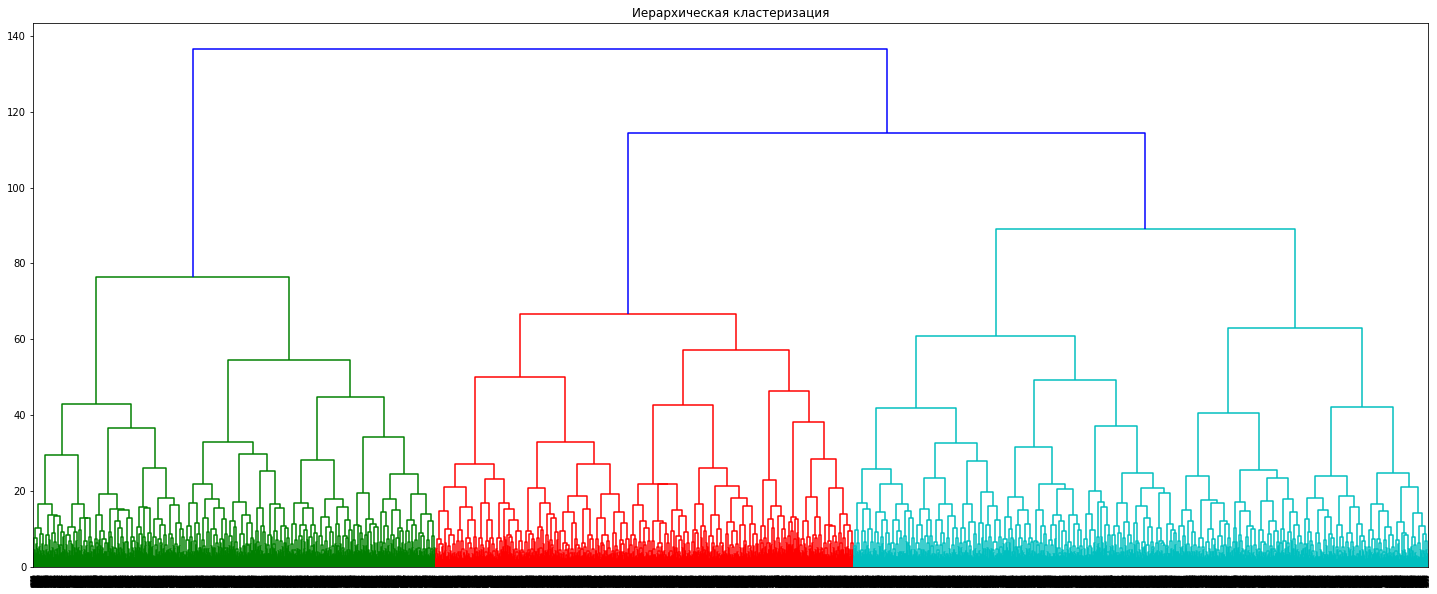

In [166]:
#построим дендрограмму
plt.figure(figsize=(25, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

Из дендрограммы можно сделать вывод, что нужно взять 3 кластера.

******************************
Посмотрим так же на коэффициент силуэта.

In [167]:
#зафиксируем случайность, чтобы каждый раз получалось одно и тоже
np.random.seed(seed=1345)

#фиксируем диапазон для количества кластеров
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

#в цикле, используя метод кластеризации K-Means разбиваем данные на указанное число кластеров
#далее, смотрим коэффициент силуэта (внутренняя метрика для оценки качества кластеризации)

for n_clusters in range_n_clusters:
    clustering = KMeans(n_clusters=n_clusters)
    clustering.fit(x_sc)
    silhouette_avg = silhouette_score(x_sc, clustering.labels_)
    print("For n =", n_clusters,
          "clusters, the average silhouette_score is :", silhouette_avg)

For n = 2 clusters, the average silhouette_score is : 0.10532919924658381
For n = 3 clusters, the average silhouette_score is : 0.10063520655023044
For n = 4 clusters, the average silhouette_score is : 0.09137970722551635
For n = 5 clusters, the average silhouette_score is : 0.09196327272988272
For n = 6 clusters, the average silhouette_score is : 0.08688630346320753
For n = 7 clusters, the average silhouette_score is : 0.08360982772604798
For n = 8 clusters, the average silhouette_score is : 0.0913187672033402
For n = 9 clusters, the average silhouette_score is : 0.09441734847455349
For n = 10 clusters, the average silhouette_score is : 0.09124964297578884
For n = 11 clusters, the average silhouette_score is : 0.09385986026852507


Действительно, после 3-х линия становится более плавной, возьмем 3 кластера.

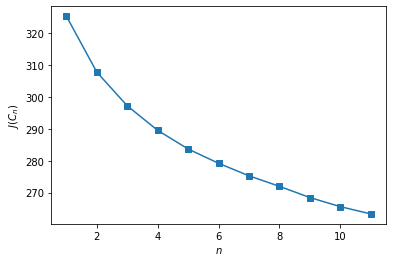

In [168]:
#так же можно убедиться в результате при помощи критерия оценки J(C),
#суммы квадратов расстояний от точек до центроидов кластеров, к которым они относятся

inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k).fit(x_sc)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 12), inertia, marker='s');
plt.xlabel('$n$')
plt.ylabel('$J(C_n)$');

### 9.2. K-means. Статистика значений кластера. <a id='109101'></a>

In [169]:
# задаём модель k_means с числом кластеров 3
km = KMeans(random_state=1345, n_clusters = 3)

# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
df2['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
df2.groupby('cluster_km').mean().T

cluster_km,0,1,2
score,650.748819,650.444966,650.913933
city,2.047252,1.320823,1.748501
gender,0.553842,0.540599,0.541093
age,37.916190,37.365572,38.001764
objects,5.034071,5.076868,4.931922
balance,122385.181617,8498.854659,78013.701178
products,1.332256,1.826056,1.524162
credit_card,1.000000,0.998196,0.000000
active,0.495648,0.505233,0.513228
salary,100789.399575,98237.888087,101015.682367


Все кластеры в группе риска оттока, но 0-й больше (23% уже ушли). Связи с полом, скоринговым баллом, объектами в собственности нет.

Склонны к оттоку:

* проживающие в Ростове Великом;
* возраст более 36;
* использующие мало банковских продуктов;
* малоактивные;
* с высоким балансом (более 100000);
* с заработной платой более 100000.

Более надежны:

* баланс менее 100000;
* использующие более 2 банковских продуктов;
* более активные;
* с маленькой заработной платой.

### 9.3. График для пары признаков "банковский продукт" и "баланс" <a id='109102'></a>

In [170]:
# определим функцию отрисовки графиков попарных признаков для кластеров:
def show_clusters_on_plot(df2, x_name,y_name, cluster_name):
    plt.figure(figsize = (8, 8))
    sns.scatterplot(df2[x_name], df2[y_name],
           hue = df2[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    sns.despine()
    plt.show()

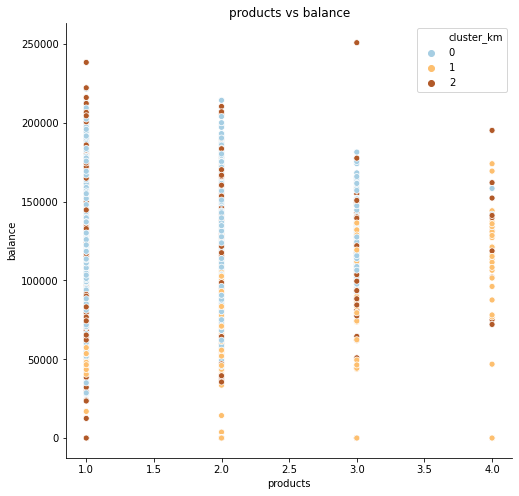

In [171]:
# отрисуем график для пары признаков "банковский продукт" и "баланс"
show_clusters_on_plot(df2,
                      'products',
                      'balance',
                      'cluster_km')

4-мя продуктами преимущественно пользуются 1 кластер, а 1-м и 2-мя преимущественно 0-й.

### 9.4. График для пары признаков "банковский продукт " и "город". <a id='109103'></a>

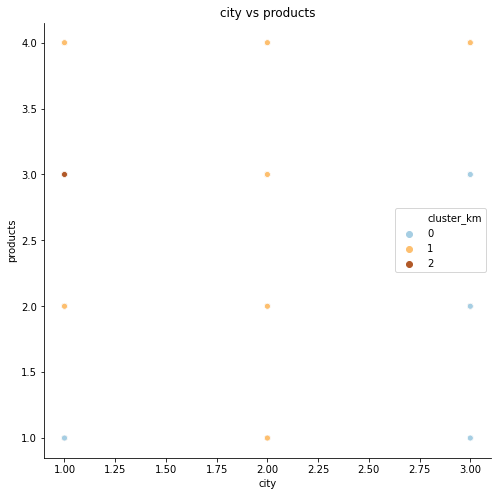

In [172]:
# отрисуем график для пары признаков "банковский продукт" и "город"
show_clusters_on_plot(df2,
                      'city',
                      'products',
                      'cluster_km')

* Все продукты в Рыбинске представлены только 1-м кластером.
* В Ростове Великом (1-2-3 продукт) больше всего 0-й кластер.
* В Ярославле все кластеры присутствуют.

### 9.5. График для пары признаков "банковский продукт " и "возраст". <a id='109104'></a>

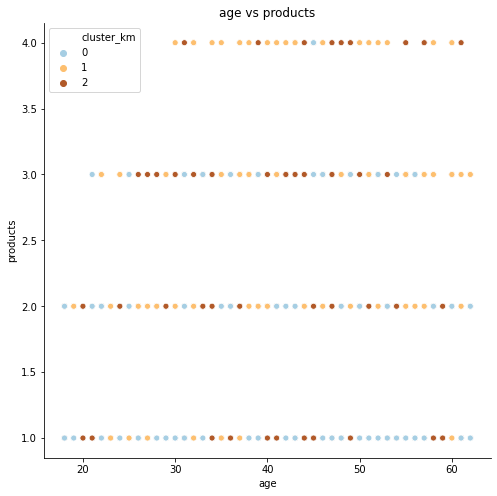

In [173]:
# отрисуем график для пары признаков "банковский продукт" и "возраст"
show_clusters_on_plot(df2,
                      'age',
                      'products',
                      'cluster_km')

* 4-мя продуктами пользуются, преимущественно 1 и 2-й кластеры.
* 1-м продуктом пользуется, преимущественно 0 кластер.

### 9.6. График для пары признаков "банковский продукт " и "кредитная карта". <a id='109105'></a>

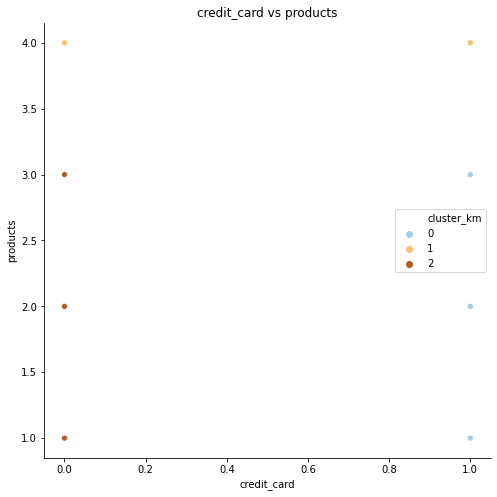

In [174]:
# отрисуем график для пары признаков "банковский продукт" и "кредитные карты"
show_clusters_on_plot(df2,
                      'credit_card',
                      'products',
                      'cluster_km')

* 1 кластер в обоих случаях пользуется 4-мя продуктами
* у 2 кластера нет кредитных карт и он пользуется 1-2-3 продуктами
* у 0 кластера есть кредитные карты и он пользуется 1-2-3 продуктами

### 9.7. График для пары признаков "кредитные карты " и "баланс". <a id='109106'></a>

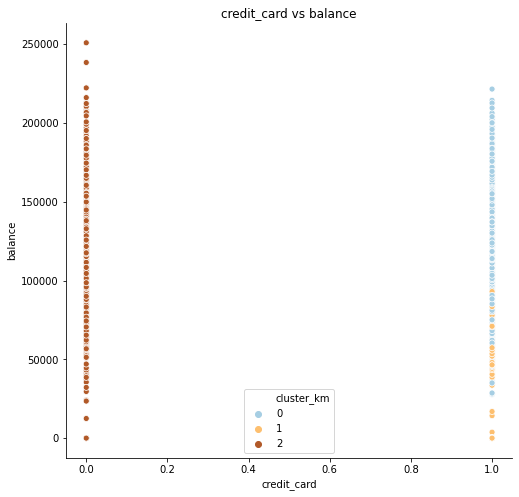

In [175]:
# отрисуем график для пары признаков "кредитные карты" и "баланс"
show_clusters_on_plot(df2,
                      'credit_card',
                      'balance',
                      'cluster_km')

* характерный признак 2 кластера - отсутствие кредитной карты
* у 0 кластера есть кредитная карта
* у 1 кластера есть кредитная карта и низкий баланс

### 9.8. График для пары признаков "скоринговый балл" и "баланс". <a id='109107'></a>

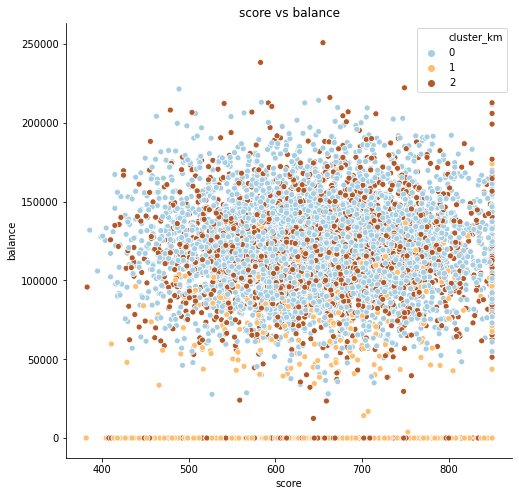

In [176]:
# отрисуем график для пары признаков "скоринговый балл" и "баланс"
show_clusters_on_plot(df2,
                      'score',
                      'balance',
                      'cluster_km')

* видна группа людей (184 человека) с максимальным скоринговым баллом, она представлена преимущественно 0 и 2 кластерами.
* нулевой баланс преобладает в 1 и не так много во 2 кластерах

### 9.9. График для пары признаков "баланс" и "объекты недвижимости". <a id='109108'></a>

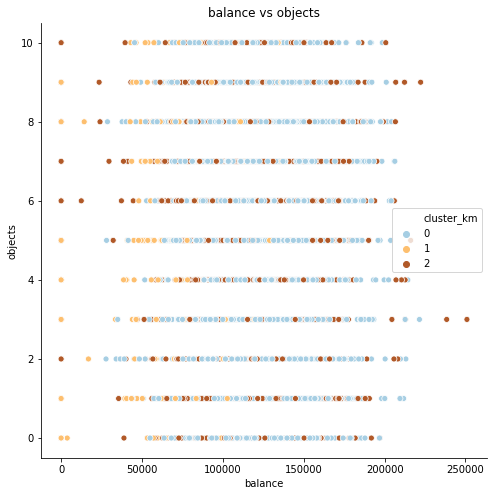

In [177]:
# отрисуем график для пары признаков "баланс" и "объекты недвижимости"
show_clusters_on_plot(df2,
                      'balance',
                      'objects',
                      'cluster_km')

* 1 кластер характеризуется низким балансом
* у всех кластеров присутствуют все количества недвижимости
* основные суммы на балансе начинаются от 30000

### 9.10. График для пары признаков "баланс" и "город". <a id='109109'></a>

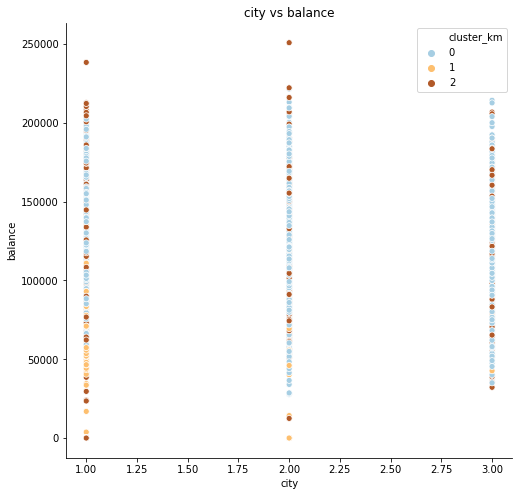

In [178]:
# отрисуем график для пары признаков "баланс" и "город"
show_clusters_on_plot(df2,
                      'city',
                      'balance',
                      'cluster_km')

* выделяется в Ярославле низкий баланс (до 70000) у 1 кластера

### 9.10. График для пары признаков "объекты недвижимости" и "город". <a id='109109'></a>

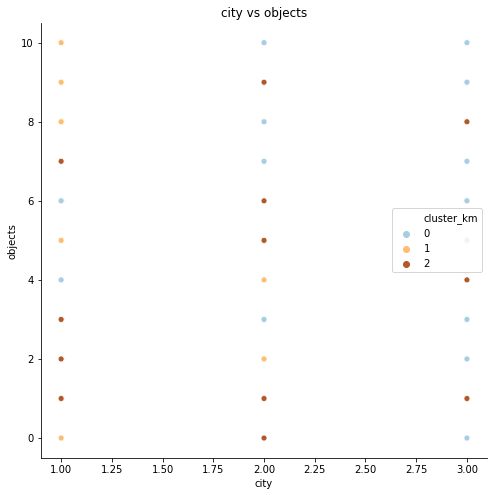

In [179]:
# отрисуем график для пары признаков "объекты недвижимости" и "город"
show_clusters_on_plot(df2,
                      'city',
                      'objects',
                      'cluster_km')

* Нет объектов в Ярославле у 1 кластера, в Рыбинске у 2 кластера, в Ростове Великом у 0-го кластера.
*************
* Ростов Великий содержит собственников только 0 и 2 кластеров.

### 9.11. График для пары признаков "заработная плата" и "город". <a id='109110'></a>

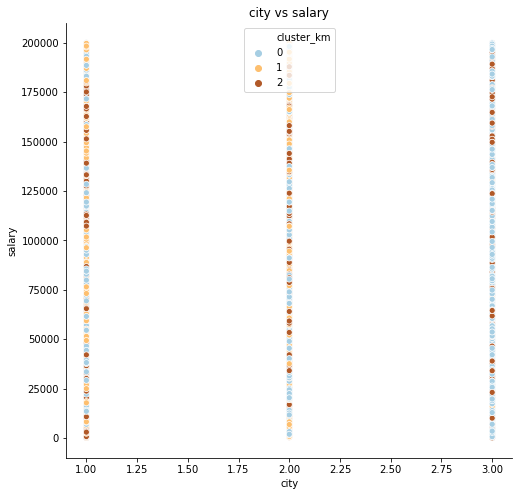

In [180]:
# отрисуем график для пары признаков "заработная плата" и "город"
show_clusters_on_plot(df2,
                      'city',
                      'salary',
                      'cluster_km')

* клиентов с низкой заработной платой вообще не представлено в Ростове Великом

In [181]:
cluster_0 = df2.query('cluster_km == 0 and churn == 1')
cluster_1 = df2.query('cluster_km == 1 and churn == 1')
cluster_2 = df2.query('cluster_km == 2 and churn == 1')
cluster_3 = df2.query('cluster_km == 3 and churn == 1')
c0 = df2.query('cluster_km == 0')
c1 = df2.query('cluster_km == 1')
c2 = df2.query('cluster_km == 2')
c3 = df2.query('cluster_km == 3')
print('Число ушедших пользователей из 0-го кластера:', len(cluster_0), ', доля:', round((len(cluster_0) / len(c0))*100), '%')
print('Число ушедших пользователей из 1-го кластера:', len(cluster_1), ', доля:', round((len(cluster_1) / len(c1))*100), '%')
print('Число ушедших пользователей из 2-го кластера:', len(cluster_2), ', доля:', round((len(cluster_2) / len(c2))*100), '%')

Число ушедших пользователей из 0-го кластера: 926 , доля: 23 %
Число ушедших пользователей из 1-го кластера: 439 , доля: 16 %
Число ушедших пользователей из 2-го кластера: 585 , доля: 21 %


**Отток присутствует во всех кластерах. Более всех склонен к оттоку 0 кластер - 23%. Следом 2 - 21%. Менее всех склонен к оттоку 1-й кластер - 16%.**

## 10. Выводы. <a id='100110'></a>

**Общие сведения:**

* всего в таблице 10000 объектов и 12 признаков для них,
* много пропусков в колонке balance - 36%,
* все ID уникальные ID,
* скоринговый балл: max - 850, min - 350, средний 650, у большинства клиентов выше 700,
* большинство (54,6%) клиентов мужчины,
* возраст клиентов от 18 до 92, средний 37-38 лет, но 72% - в возрасте от 25 до 45 лет,
* количество объектов в собственности от 0 до 10. В среднем 5 объектов в собственности, но 35,3% имеет от 6 до 10 объектов,
* баланс колеблется от 0 до 250898, mean - 76485, а median - 97198 довольно большой разброс, скорее всего на это влияет 36% клиентов с 0 балансом,
* количество банковских продуктов - 4. Большинство пользуется 1 (45,9%) и 2-мя (45,9%) продуктами,
* кредитные карты есть у 70,5% клиентов,
* 51,5% клиентов активны,
* заработная плата колеблется от 11 до 199992. Средняя - 100000, без большого разброса. Можно сделать вывод, что большинство клиентов, держат на счете 1 среднюю зарплату,
* большой отток - 20,3%,
* большинство в Ярославле - 50,1%.

**Выводы из исследования:**

* Сильной корреляции между признаками нет. Есть небольшая между возрастом и оттоком (0,29), между количеством используемых банковских продуктов и остатком на счете (0,3), еще меньшая связь между балансом и оттоком (0,12) и активностью и оттоком (0,16).
* Средняя зарплата колеблется около 100000 до 64 лет, потом начинаются очень сильные колебания (и в количестве объектов недвижимости), это объяснимо выходом на пенсию.
* В Ярославле ярко выражено падение з/п после 63 лет.
* В Рыбинске клиенты в возрасте от 18 до 35 имеют крайне низкую з/п. Уточнить!
* Средний баланс, так же как у заработной платы колеблется около 100000. После 59 начинаются колебания. Выбросов практически нет. На средний баланс очень влияют клиенты из Ростова, т.к. их средний баланс практически в 2 раза выше, чем в Ярославле и Рыбинске, но нужно отметить, что так же много выбросов.
* Средний баланс у пользующихся 1 и 4-мя продуктами на уровне 120000, у пользущихся 3-мя продуктами - 100000, среди пользующихся 2-мя продуктами 0-й баланс преобладает (57%) (отток среди них 13,8% - видно, что нулевой баланс напрямую на отток не влияет)!

**Выводы из исследования без выбросов:**

* убрали клиентов старше 62 лет и со скоринговым баллом ниже 380 (3.73 % клиентов),
* сильной корреляции между признаками не появилось, но связь между возрастом и оттоком выросла от (0.29) до (0.36),
* при разделении по городам матрицы корреляции показали: сильнее всего связь между оттоком и возрастом в Ростове Великом (0,41), есть связь (0,4) между используемым продуктом и балансом только в Ярославле и Рыбинске,
* при разделении по оттоку матрицы корреляции показали: у оставшихся клиентов - немного усилилась (0,42) связь между балансом на счете и количеством используемых банковских продуктов и появилась небольшая(0,1) связь между активностью и возрастом, у ушедших клиентов не выявлено вообще.

**Признаки разделенные по оттоку показали, что:**

* особой разницы в средней зараплате нет, 
* в группе оттока средний баланс на счете выше, 
* разницы в скоринговых баллах между группами нет, 
* средний возраст ушедших выше, чем у оставшихся, 
* оставшиеся активнее, 
* отток явно выше в % соотношении в городе Ростов Великий - 32%. В Рыбинске - 16,5%. В Ярославле - 16,1%.
* отток выше среди клиентов в возрасте от 35 до 52 в Ростове Великом и Ярославле (оба пола),
* среди оставшихся преобладают мужчины (больше) и женщины от 23 до 47 лет из Ярославля,
* ушедшие клиенты в Рыбинске и Ярославле имели, в среднем, большие остатки на счете,
* средние суммы на счетах выше в городе Ростове Великом во обеих группах,
* присутствует явное разделение ушедших и оставшихся пользователей по количеству используемых продуктов. У оставшихся пользователей преобладает использование двух продуктов, затем одного продукта, трёх в незначительном количестве.
* ушедшие клиенты больше пользовались одним продуктом, двумя в 3 раза меньше, тремя еще меньше, но нужно обратить внимание, что пользование 4-мя продуктами было только среди ушедших.
* В каждом городе среди ушедших примерно в 2 раза больше неактивных клиентов.
*****************
_**Общий портрет "среднего" клиента:**_
средний возраст клиента 37-38 лет, у него 5 объектов недвижимости в собственности, средняя заработная плата 100000, ее же (100000) он держит на счете. Клиент активен и имеет кредитную карту. Он использует 1-2 банковских продукта. Средний скоринговый балл - 650.
_**Более надежны:**_
баланс менее 100000, использующие более 2 банковских продуктов, более активные, с маленькой заработной платой.
*****************
**Портрет клиентов склонных к оттоку:**
* низкая активность,
* клиенты склонны к большему накоплению (возможно отток связан с невыгодными условиями вклада?),
* отток выше в Ростове Великом,
* к оттоку склонны клиенты более старшего возраста (35-52);
* но так же склонны к оттоку клиенты с большой заработной платой.

**Подтвержденные гипотезы:**
1. Отток в Ростове Великом выше.  
2. Средний баланс ушедших клиентов в Ростове Великом выше (но средний баланс в Ростове и вообще выше).
3. Активность отточных клиентов ниже.
4. Возраст ушедших больше среднего.
5. Пользование банковским продуктом влияет на отток, но сложно сказать, как количество влияет на отток, нужно выяснить, какой именно продукт был среди 4-х (по которыму отток 100%) - требует дополнительного исследования!

_Машинное обучение, после выяснения всех обстоятельств, можно провести с помощью градиентный бустинга (точность 86%). Отток присутствует во всех кластерах. Более всех склонен к оттоку 0 кластер - 23%. Следом 2 - 21%. Менее всех склонен к оттоку 1-й кластер - 16%._

**Проблемы:**
* выделяется группа (184 человекa) клиентов с максимальным (850) скоринговым баллом в группе оставшихся. Выяснить у коллег не ошибка ли?
* уточнить у коллег, по какой причине были не заполнены колонки с балансом среди пользующихся тремя продуктами и частично двумя, в городах Ярославль и Рыбинск!
* разобраться какой именно банковский продукт влияет на отток (для этого нужно не количество, а вид продукта), предположение, что среди 2-х популярных продуктов - именно второй (с нулевым балансом) - хранение ценностей (аренда сейфа/ячейки).

## 11. Базовые рекомендации по работе с клиентами. <a id='100111'></a>

* выяснить причину того, что клиенты с более высоким балансом начинают уходить;
* так же выяснить причины оттока в Ростове Великом, только ли их высокий средний баланс влияет на это;
* стимулировать активность клиентов;
* выяснить причину более высокого возраста отточных клиентов (возможно, чем больше возраст, чем больше денег на счете и именно это первопричина, или конкретно возраст влияет);
* выяснить какие конкретно продукты были среди 4-х продуктов, от которых отказались полностью во всех 3-х городах. 
**Думаю, что все-таки имеет место неправильная формулировка - в колонке balance не количество продуктов, а определенный банковский продукт.
Тогда мы могли бы предположить, что 4-й продукт это один из 4-х базовых банковских продуктов (депозит (до востребования, сберегательный), валютные операции, хранение ценностей, потребительский кредит. Тогда можно было бы делать предположения, если сложить все признаки оттока.**